In [50]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [51]:
sub = pd.read_csv("sub.csv")
len(sub)

310480

In [52]:
sessions = pd.read_csv("~/Documents/data/airbnb/sessions.csv")
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [53]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [54]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [55]:
sessions['action'].value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

In [56]:
sessions['action_detail'].value_counts()

view_search_results               1776885
p3                                1376550
-unknown-                         1031141
wishlist_content_update            706824
user_profile                       656839
change_trip_characteristics        487744
similar_listings                   364624
user_social_connections            336799
update_listing                     269779
listing_reviews                    269021
dashboard                          152952
user_wishlists                     152672
header_userpic                     141830
message_thread                     132395
edit_profile                       108686
message_post                        87103
contact_host                        81041
unavailable_dates                   77795
confirm_email_link                  58422
create_user                         54878
change_contact_host_dates           52517
user_profile_content_update         50434
user_reviews                        49665
p5                                

In [57]:
# sns.distplot(sessions['secs_elapsed']);
# plt.show()

In [58]:
age_gender = pd.read_csv("~/Documents/data/airbnb/age_gender_bkts.csv")
age_gender.head(50)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [59]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [60]:
age_gender.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

In [61]:
#AU = austrailia
#CA = canada
#DE = germany
#ES = spain
#FR = france
#GB = england
#IT = italia
#NL = netherland 
#PT = Portugal
#US = USA

countries = pd.read_csv("~/Documents/data/airbnb/countries.csv")
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [62]:
countries['country_destination'].value_counts()

CA    1
IT    1
AU    1
DE    1
US    1
PT    1
FR    1
ES    1
NL    1
GB    1
Name: country_destination, dtype: int64

In [63]:
# submission = pd.read_csv("~/Documents/data/airbnb/sample_submission_NDF.csv")
# submission.head()

In [64]:
# submission.info()

In [65]:
test = pd.read_csv("~/Documents/data/airbnb/test_users.csv")
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [67]:
test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [68]:
train = pd.read_csv("~/Documents/data/airbnb/train_users_2.csv")
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [70]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [71]:
train['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [72]:
train['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [73]:
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

# age

In [100]:
train[train['age'] > 120]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,-unknown-,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,20100714230556,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,20100725234419,2010-07-26,MALE,2013.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1200,3amf04n3o3,2010-07-27,20100727190447,2010-07-29,FEMALE,2014.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
1239,6vpmryt377,2010-07-30,20100730055204,2010-07-30,FEMALE,2014.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,CA
1257,uxy91xb5p2,2010-08-01,20100801071023,2010-08-01,MALE,2014.0,facebook,3,en,direct,direct,untracked,Web,Windows Desktop,Chrome,US
1308,bno0vva4uz,2010-08-06,20100806133725,NaN,MALE,2014.0,basic,3,en,other,craigslist,linked,Web,Windows Desktop,Chrome,NDF
1474,h3rrmak4tu,2010-08-21,20100821225214,NaN,MALE,2014.0,facebook,2,pt,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1502,fou0j7fhnm,2010-08-24,20100824205045,2010-08-25,FEMALE,2014.0,basic,3,en,sem-non-brand,google,untracked,Web,Windows Desktop,Chrome,US


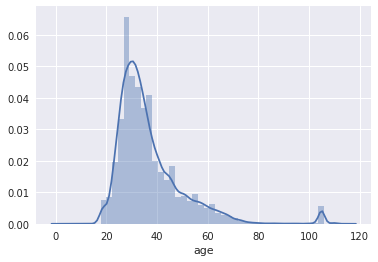

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


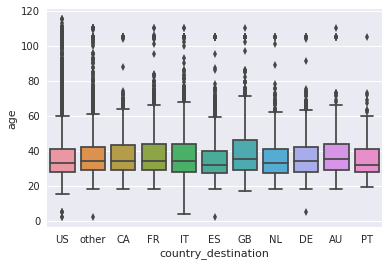

KeyboardInterrupt: 

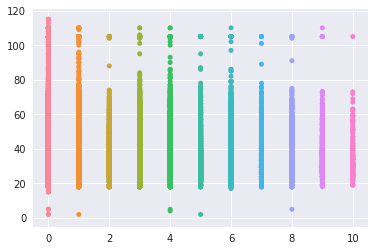

In [110]:
train_copy = train.copy()
train_copy = train_copy.dropna()
train_copy = train_copy[train_copy['age'] <= 120]

ax1 = sns.distplot(train_copy['age'])
plt.show()
ax2 = sns.boxplot(x = train_copy['country_destination'], y = train_copy['age'], data = train_copy)
plt.show()
ax3 = sns.swarmplot(x = train_copy['country_destination'], y = train_copy['age'], data = train_copy)
plt.show()

In [ ]:
train.index

# age nan value manipulation

- DBSCAN
- heatmap age vs related features

In [ ]:
table = pivot_table(train, values='age', columns=['gender', 'signup_method', 'affiliate_provider', 'signup_app'])

In [107]:
train_copy.describe()

,timestamp_first_active,age,signup_flow
count,6.779700e+04,67797.000000,67797.000000
mean,2.013035e+13,37.085491,2.439282
std,9.436387e+09,13.750874,6.538162
min,2.009061e+13,2.000000,0.000000
25%,2.012112e+13,28.000000,0.000000
50%,2.013082e+13,33.000000,0.000000
75%,2.014023e+13,42.000000,0.000000
max,2.014063e+13,115.000000,25.000000


In [74]:
# import seaborn as sns; sns.set(color_codes=True)

# ax = sns.boxplot(x='country_destination', y="age", data=train_copy)

In [75]:
train_no_target = train.iloc[:,:-1]
train_no_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 15 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 24.4+ MB


In [76]:
train_test = pd.concat([train_no_target, test], axis=0)
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 15 columns):
id                         275547 non-null object
date_account_created       275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_booking         88908 non-null object
gender                     275547 non-null object
age                        158681 non-null float64
signup_method              275547 non-null object
signup_flow                275547 non-null int64
language                   275547 non-null object
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
first_affiliate_tracked    269462 non-null object
signup_app                 275547 non-null object
first_device_type          275547 non-null object
first_browser              275547 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 33.6+ MB


In [97]:
train_test.describe()

,timestamp_first_active,age,signup_flow
count,2.755470e+05,158681.000000,275547.000000
mean,2.013310e+13,47.145310,4.291965
std,9.146438e+09,142.629468,8.794313
min,2.009032e+13,1.000000,0.000000
25%,2.013040e+13,28.000000,0.000000
50%,2.014010e+13,33.000000,0.000000
75%,2.014062e+13,42.000000,1.000000
max,2.014093e+13,2014.000000,25.000000


In [77]:
train_test.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


In [78]:
# #data type convert
# train_test["date_account_created"] =  pd.to_datetime(train_test["date_account_created"])
# train_test["date_first_booking"] =  pd.to_datetime(train_test["date_first_booking"])

# train_test["date_first_booking"] =  pd.to_datetime(train_test["date_first_booking"])
# train_test.info()

In [80]:
# train_test = train_test.fillna(0)
# train_test.info()

In [81]:
train_test.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


In [82]:
# vals = train_test.values
# X = vals[:piv_train]
# le = LabelEncoder()
# y = le.fit_transform(labels)   
# X_test = vals[piv_train:]

67799

In [86]:
all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67799 entries, 2 to 213445
Data columns (total 15 columns):
id                         67799 non-null object
date_account_created       67799 non-null object
timestamp_first_active     67799 non-null int64
date_first_booking         67799 non-null object
gender                     67799 non-null object
age                        67799 non-null float64
signup_method              67799 non-null object
signup_flow                67799 non-null int64
language                   67799 non-null object
affiliate_channel          67799 non-null object
affiliate_provider         67799 non-null object
first_affiliate_tracked    67799 non-null object
signup_app                 67799 non-null object
first_device_type          67799 non-null object
first_browser              67799 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 8.3+ MB


68171


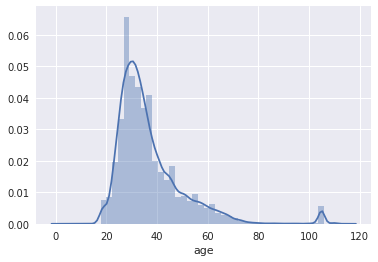

In [96]:
all_copy = train_test.copy()
all_copy = all_copy.dropna()
print(len(all_copy))
all_copy = all_copy[all_copy['age'] <= 120]
sns.distplot(all_copy['age'])
plt.show()

In [93]:
all_copy[all_copy['age'] > 100]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
398,9ouah6tc30,2010-04-12,20100412231534,2010-04-12,FEMALE,104.0,facebook,3,en,other,craigslist,linked,Web,iPhone,Mobile Safari
627,dc3udjfdij,2010-05-19,20100519012455,2010-06-16,-unknown-,105.0,basic,2,en,other,craigslist,omg,Web,Mac Desktop,Safari
1190,qc9se9qucz,2010-07-27,20100727002029,2010-07-27,-unknown-,105.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Firefox
1208,cguxptdi6h,2010-07-28,20100728034415,2010-07-28,-unknown-,105.0,basic,3,en,direct,direct,untracked,Web,Mac Desktop,Firefox
1615,uqncyj8byz,2010-09-04,20100904210638,2010-10-03,FEMALE,101.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE
1739,eef74e94rg,2010-09-15,20100915023255,2010-09-20,-unknown-,105.0,facebook,2,en,sem-non-brand,google,tracked-other,Web,Other/Unknown,Mobile Firefox
2289,v1xp5ggiti,2010-11-04,20101104235028,2011-05-16,-unknown-,105.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,Chrome
2654,kkfa80noq4,2010-12-15,20101215031123,2010-12-16,FEMALE,105.0,basic,2,en,other,craigslist,untracked,Web,iPhone,Mobile Safari
2775,34tpc91y6j,2010-12-29,20101229034206,2011-09-29,MALE,105.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
2969,v3gbd5l942,2011-01-17,20110117225019,2011-01-22,FEMALE,105.0,basic,2,en,direct,direct,untracked,Web,Mac Desktop,Safari


# random forest regression

In [31]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

rng = np.random.RandomState(0)

dataset = load_boston()
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full).mean()
print("Score with the entire dataset = %.2f" % score)

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = int(np.floor(n_samples * missing_rate))
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=np.bool),
                             np.ones(n_missing_samples,
                                     dtype=np.bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimate the score without the lines containing missing values
X_filtered = X_full[~missing_samples, :]
y_filtered = y_full[~missing_samples]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_filtered, y_filtered).mean()
print("Score without the samples containing missing values = %.2f" % score)

# Estimate the score after imputation of the missing values
X_missing = X_full.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y_full.copy()
estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score with the entire dataset = 0.56
Score without the samples containing missing values = 0.48
Score after imputation of the missing values = 0.57


In [32]:
# train_1 = train.drop(['country_destination'], axis=1)
# train_1.info()

In [33]:
# y = train['country_destination']

In [34]:
# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(train_1, y)

# print(regr.feature_importances_)
# print(regr.predict([[0, 0, 0, 0]]))


# XGBoost

In [35]:
import xgboost as xgb

In [36]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 15 columns):
id                         275547 non-null object
date_account_created       275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_booking         88908 non-null object
gender                     275547 non-null object
age                        158681 non-null float64
signup_method              275547 non-null object
signup_flow                275547 non-null int64
language                   275547 non-null object
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
first_affiliate_tracked    269462 non-null object
signup_app                 275547 non-null object
first_device_type          275547 non-null object
first_browser              275547 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 33.6+ MB


In [39]:
data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
label = np.random.randint(2, size=5)  # binary target
dtrain = xgb.DMatrix(data, label=label)

In [43]:
dtrain = xgb.DMatrix(train_test, missing=-999.0)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields id, date_account_created, date_first_booking, gender, signup_method, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser

# nueral network

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [46]:
clf.fit(train, train_no_target)

ValueError: could not convert string to float: 'NDF'